**Loan Approval Prediction System**  
**Dataset was from Kaggle (2022)**


**Importing all the neccessary Libraries**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import tqdm
import os
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import metrics


**Loading the dataset**

In [2]:
path = "loan dataset.csv"
df = pd.read_csv(path)

**Getting insights about the data**

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.rename(columns={'ApplicantIncome':'Applicant-Income','CoapplicantIncome':'Co-applicant_Income'},inplace=True)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant-Income', 'Co-applicant_Income',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [7]:
#checking for the missing values 
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
Applicant-Income        0
Co-applicant_Income     0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [8]:
#getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    object 
 2   Married              611 non-null    object 
 3   Dependents           599 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        582 non-null    object 
 6   Applicant-Income     614 non-null    int64  
 7   Co-applicant_Income  614 non-null    float64
 8   LoanAmount           592 non-null    float64
 9   Loan_Amount_Term     600 non-null    float64
 10  Credit_History       564 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#getting some statistical view about the data 
df.describe()

,Applicant-Income,Co-applicant_Income,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#dropping out the missing values and assigning it to a new variable name called data 
data = df.dropna()

In [11]:
print(data.isnull().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant-Income       0
Co-applicant_Income    0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64


**Perforrming some data manipulation**

In [12]:
##Replacing the labels with numerical values for easyness of the machine learning 
data = data.replace({'Male':0,'Female':1,'Yes':0,'No':1,'Graduate':0,'Not Graduate':1,
                  'Rural':0,'Urban':1,'Semiurban':2,'N':0,'Y':1,'3+':4})

In [13]:
#Dropping the loan - id column because its unwanted.
data = data.drop('Loan_ID',axis=1)

In [14]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant-Income,Co-applicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1


**Performing some Explanatory data analysis and Visualisation**

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

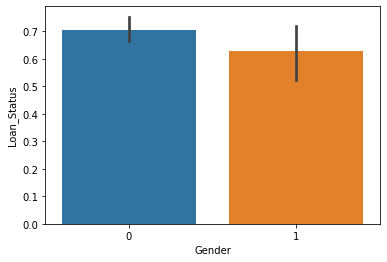

In [15]:
sns.barplot(x='Gender',y='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

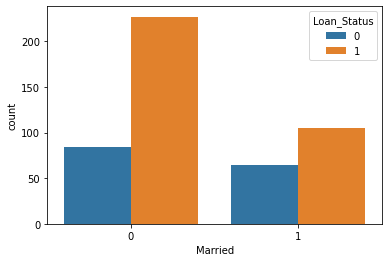

In [16]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

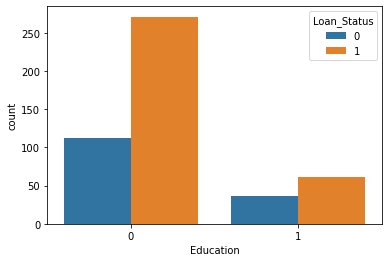

In [17]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

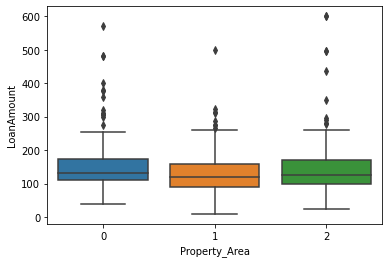

In [18]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=data)

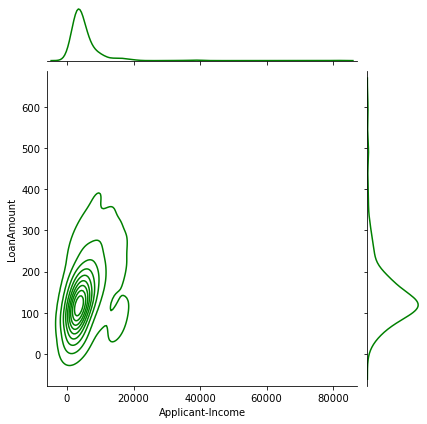

In [19]:
sns.jointplot(x='Applicant-Income',y='LoanAmount',kind='kde',color='g',data=data)

**Spliting the data for training and testing**

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop('Loan_Status',axis=1)
Y = data['Loan_Status']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

**Training the Model**  
**Using SVM**

In [21]:
model = svm.SVC()

In [22]:
model_Train = model.fit(X_train,Y_train)

**Evaluating the model**

In [23]:
predicted_training_output = model_Train.predict(X_train)
predicted_testing_output = model_Train.predict(X_test)

**Checking the performance of the model**

In [24]:
training_accuracy = metrics.accuracy_score(Y_train,predicted_training_output)
testing_accuracy = metrics.accuracy_score(Y_test,predicted_testing_output)
print(training_accuracy)
print(testing_accuracy)

0.71875
0.625


In [25]:
report= metrics.classification_report(Y_train,predicted_training_output)

In [26]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       113
           1       0.72      1.00      0.83       271

    accuracy                           0.72       384
   macro avg       0.86      0.52      0.46       384
weighted avg       0.80      0.72      0.61       384



**Thank you !**  
**Olatunde**